## Project compliance default

### Objective:
- The objective of this work is to train a classification model that can inform us whether a person may default on a financial loan.

- O objetivo desse trabalho é treinar um modelo de classificação que possa nos informar se uma pessoa pode ficar inadimplente em um empréstimo financeiro.

### Data Origin:
- Dataset: https://www.kaggle.com/datasets/itssuru/loan-data

- Publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Fortunately, as an investor, you would want to invest in people who show a profile of having the security of paying you back.

- Dados disponíveis publicamente do LendingClub.com. O Lending Club conecta pessoas que precisam de dinheiro (tomadores de empréstimo) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostrassem um perfil de ter a segurança de pagar você de volta.

- Aqui está o que as colunas representam:

    credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub.com e 0 caso contrário.

    purpose: O propósito do empréstimo (assume os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").

    int.rate: A taxa de juros do empréstimo, como uma proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.

    installment: As parcelas mensais devidas pelo mutuário se o empréstimo for financiado.

    log.annual.inc: O logaritmo natural da renda anual autodeclarada do mutuário.

    dti: A relação dívida/renda do mutuário (valor da dívida dividido pela renda anual).

    fico: A pontuação de crédito FICO do mutuário.

    days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.

    revol.bal: Saldo rotativo do mutuário (valor não pago no final do ciclo de cobrança do cartão de crédito).

    revol.util: Taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).

    inq.last.6mths: Número de consultas do mutuário por credores nos últimos 6 meses.

    delinq.2yrs: Número de vezes que o mutuário atrasou um pagamento em mais de 30 dias nos últimos 2 anos.

    pub.rec: Número de registros públicos depreciativos do mutuário (declarações de falência, penhoras fiscais ou julgamentos).

    not.fully.paid: O empréstimo não foi totalmente pago.

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [50]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [51]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [ ]:
# carregando arquivo de dados
df_emprestimo = pd.read_csv('dataset/loan_data.csv', sep=',')

In [53]:
# verificando a quantidade de linhas e colunas do dataframe
df_emprestimo.shape

(9578, 14)

In [54]:
# reconhecendo as primeiras linhas do dataframe
df_emprestimo.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


- Vamos modificar inicialmente o nome das colunas para facilitar o trabaho

In [55]:
# renomeando as colunas para facilitar o trabalho
df_emprestimo.columns = ['atende_criterios', 'utilizacao', 'tx_juros', 'vr_parcelas', 'log_renda_anual', \
                         'idx_div_renda', 'pont_mutuario', 'dias_credito', 'saldo_rotativo', 'tx_util_credito', \
                         'consult_mutuario_cred', 'nro_atraso', 'nro_reg_deprec', 'devedor']

In [56]:
# verificando a renomeação das colunas
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   dias_credito           9578 non-null   float64
 8   saldo_rotativo         9578 non-null   int64  
 9   tx_util_credito        9578 non-null   float64
 10  consult_mutuario_cred  9578 non-null   int64  
 11  nro_atraso             9578 non-null   int64  
 12  nro_reg_deprec         9578 non-null   int64  
 13  devedor                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

- Observando que a quantidade de linhas sem nulos é o mesmo da quantidade total de linhas do dataframe, portanto até esse momento não há nulos.

In [57]:
# confirmando a inexistência de nulos
df_emprestimo.isnull().sum()

atende_criterios         0
utilizacao               0
tx_juros                 0
vr_parcelas              0
log_renda_anual          0
idx_div_renda            0
pont_mutuario            0
dias_credito             0
saldo_rotativo           0
tx_util_credito          0
consult_mutuario_cred    0
nro_atraso               0
nro_reg_deprec           0
devedor                  0
dtype: int64

- Confirmando, através da função isnull(), que não existe nenhum nulo nas linhas do dataframe.

In [58]:
# verificando se existe registros duplicados
df_emprestimo.duplicated().sum()

0

In [59]:
# verificando o conteudo de cada coluna (variável) do dataframe
df_emprestimo.head(10)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,dias_credito,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_atraso,nro_reg_deprec,devedor
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


- Observamos que temos algumas variáveis categóricas: atende_criterios, utilizacao, consult_mutuario_cred, nro_atraso, nro_reg_deprec e devedor sendo as demais algumas contínuas e discretas que podem ser transformadas em categorias através de faixas de valores, isso será verificado mais a frente.
- Nossa variável target (alvo) será a devedor que identifica se a pessoa será ou não devedor (0-não 1-sim)

In [60]:
# listando a relação de colunas
list(df_emprestimo.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'dias_credito',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_atraso',
 'nro_reg_deprec',
 'devedor']

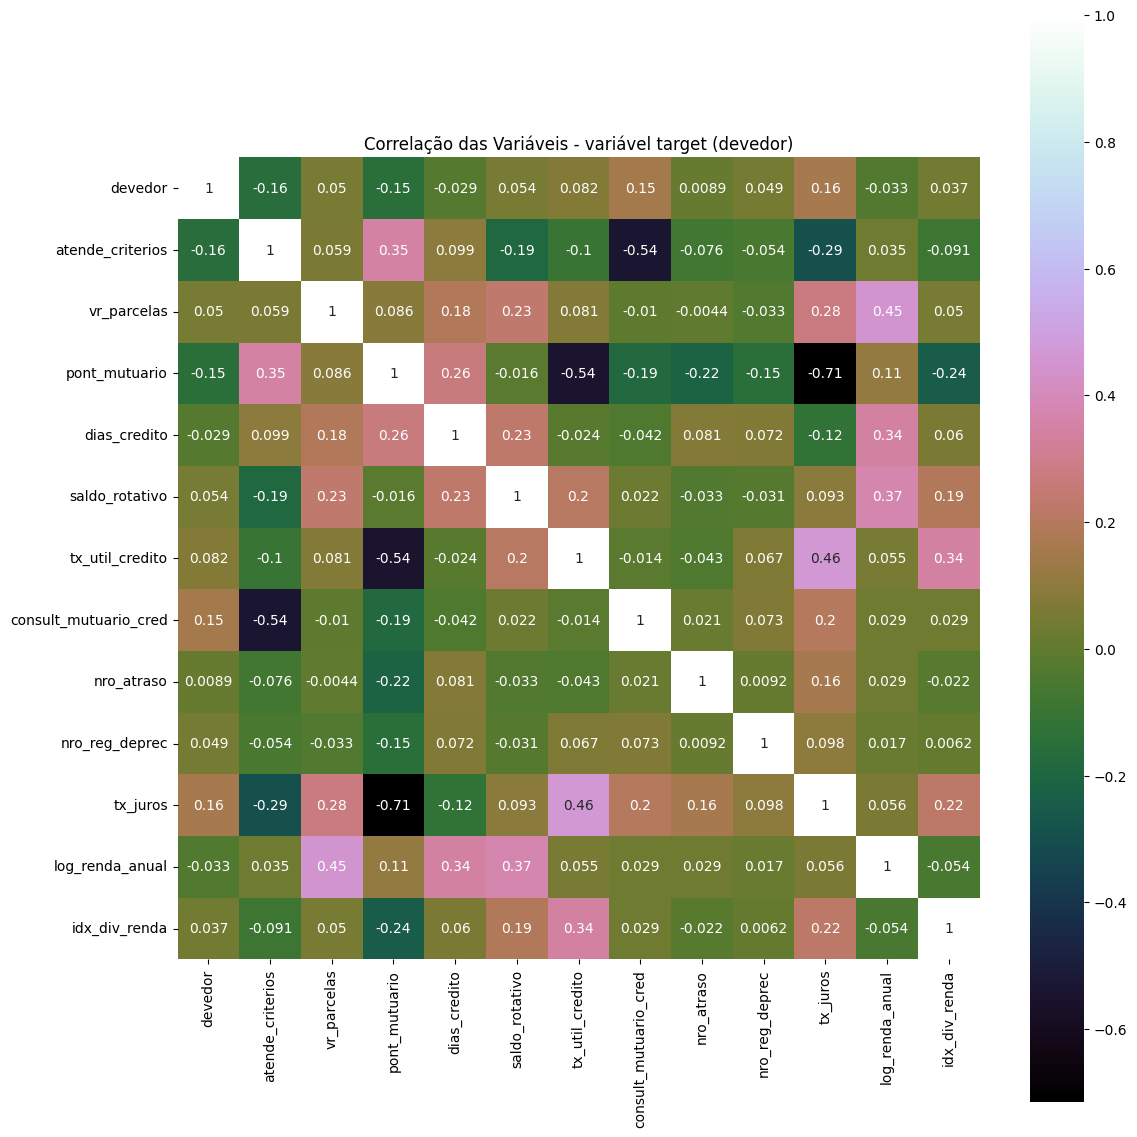

In [61]:
# analisando a correlação entre as variáveis
lista_corr = list(['devedor', 'atende_criterios',
                        #'utilizacao',
                        'vr_parcelas',
                        'pont_mutuario',
                        'dias_credito',
                        'saldo_rotativo',
                        'tx_util_credito',
                        'consult_mutuario_cred',
                        'nro_atraso',
                        'nro_reg_deprec',
                        'tx_juros',
                        'log_renda_anual',
                        'idx_div_renda'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_emprestimo[lista_corr].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

In [62]:
# criando uma lista sem a variável devedor (target) para fazer a correlação
lista_corr[1:]

['atende_criterios',
 'vr_parcelas',
 'pont_mutuario',
 'dias_credito',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_atraso',
 'nro_reg_deprec',
 'tx_juros',
 'log_renda_anual',
 'idx_div_renda']

In [63]:
# criando uma lista das colunas com menos de 0.03 (3%) de correlação
correlation = df_emprestimo[lista_corr[:]].corr()
correlation_devedor = abs(correlation['devedor'])
drop_list_corr = sorted(list(correlation_devedor[correlation_devedor < 0.0300].index))
print(drop_list_corr)

['dias_credito', 'nro_atraso']


- As colunas com corelação menor que 3% com a variável alvo serão eliminadas por apresentarem um percentual muito baixo podendo prejudicar nosso trabalho.

In [64]:
# verificando as colunas do dataframe antes da exclusão
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   dias_credito           9578 non-null   float64
 8   saldo_rotativo         9578 non-null   int64  
 9   tx_util_credito        9578 non-null   float64
 10  consult_mutuario_cred  9578 non-null   int64  
 11  nro_atraso             9578 non-null   int64  
 12  nro_reg_deprec         9578 non-null   int64  
 13  devedor                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

In [65]:
# apagando colunas com correlação menor que 3%
df_emprestimo.drop(labels=drop_list_corr, axis=1, inplace=True) 

In [66]:
# verificando as colunas que sobraram
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   saldo_rotativo         9578 non-null   int64  
 8   tx_util_credito        9578 non-null   float64
 9   consult_mutuario_cred  9578 non-null   int64  
 10  nro_reg_deprec         9578 non-null   int64  
 11  devedor                9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB


- Foram excluidas 2 colunas com percentual de correlaçaõ abaixo de 3% nos sobrando 12 colunas para trabalharmos

In [67]:
# reduzindo as casas decimais para facilitar o agrupamento dos valores com menor ocorrência
df_emprestimo['tx_juros'] = round(df_emprestimo['tx_juros'], 2)
df_emprestimo['vr_parcelas'] = round(df_emprestimo['vr_parcelas'], 0)
df_emprestimo['log_renda_anual'] = round(df_emprestimo['log_renda_anual'], 0)
df_emprestimo['idx_div_renda'] = round(df_emprestimo['idx_div_renda'], 0)

In [68]:
# analizando o percentual de ocorrência de cada valor para ver quais valores muito pequenos precisam ser juntados
# com outros maiores
print(df_emprestimo.atende_criterios.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.utilizacao.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.tx_juros.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.vr_parcelas.value_counts(normalize=True).head(20)*100)
print('')
print(df_emprestimo.log_renda_anual.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.idx_div_renda.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.pont_mutuario.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.saldo_rotativo.value_counts(normalize=True).head(20)*100)
print('')
print(df_emprestimo.tx_util_credito.value_counts(normalize=True).head(20)*100)
print('')
print(df_emprestimo.consult_mutuario_cred.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.nro_reg_deprec.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.devedor.value_counts(normalize=True)*100)

atende_criterios
1    80.496972
0    19.503028
Name: proportion, dtype: float64

utilizacao
debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: proportion, dtype: float64

tx_juros
0.13    16.892880
0.12    13.468365
0.11    12.330340
0.14    12.257256
0.09     9.135519
0.15     8.540405
0.10     7.151806
0.08     7.068281
0.16     5.345584
0.17     2.463980
0.07     2.150762
0.18     1.639173
0.19     0.897891
0.20     0.313218
0.21     0.198371
0.06     0.125287
0.22     0.020881
Name: proportion, dtype: float64

vr_parcelas
156.0    0.636876
170.0    0.626436
164.0    0.605554
166.0    0.553351
160.0    0.542911
318.0    0.532470
168.0    0.511589
316.0    0.490708
333.0    0.480267
172.0    0.480267
336.0    0.459386
328.0    0.428064
202.0    0.417624
167.0    0.417624
96.0     0.417624
269.0    0.407183
1

In [69]:
# verificando os primeiro registros do df
df_emprestimo.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor
0,1,debt_consolidation,0.12,829.0,11.0,19.0,737,28854,52.1,0,0,0
1,1,credit_card,0.11,228.0,11.0,14.0,707,33623,76.7,0,0,0
2,1,debt_consolidation,0.14,367.0,10.0,12.0,682,3511,25.6,1,0,0


In [70]:
# agrupando os valores com ocorrência menor que 3% com o próximo valor acima
df_emprestimo.tx_juros[df_emprestimo['tx_juros'].isin([0.17, 0.19, 0.20, 0.21, 0.22])] = 0.18
df_emprestimo.tx_juros[df_emprestimo['tx_juros'].isin([0.06, 0.07])] = 0.08

df_emprestimo.log_renda_anual[df_emprestimo['log_renda_anual'].isin([13, 14, 15])] = 12
df_emprestimo.log_renda_anual[df_emprestimo['log_renda_anual'].isin([8, 9])] = 10

df_emprestimo.idx_div_renda[df_emprestimo['idx_div_renda'] > 23] = 23
df_emprestimo.idx_div_renda[df_emprestimo['idx_div_renda'].isin([0, 2])] = 1

df_emprestimo.pont_mutuario[df_emprestimo['pont_mutuario'].isin([747])] = 752
df_emprestimo.pont_mutuario[df_emprestimo['pont_mutuario'].isin([762])] = 757
df_emprestimo.pont_mutuario[df_emprestimo['pont_mutuario'].isin([767,777,652,657,782])] = 772 
df_emprestimo.pont_mutuario[df_emprestimo['pont_mutuario'].isin([642,792,787,797])] = 647                                                               

df_emprestimo.pont_mutuario[df_emprestimo['pont_mutuario'].isin([807,812,632,817,822,637,627,612,827,617,622,737])] = 802

df_emprestimo.consult_mutuario_cred[df_emprestimo['consult_mutuario_cred'] > 5] = 5

df_emprestimo.nro_reg_deprec[df_emprestimo['nro_reg_deprec'] > 1] = 1

In [71]:
# analizando o percentual de ocorrência de cada valor para ver como ficou ajuntando com valores maiores
print(df_emprestimo.tx_juros.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.log_renda_anual.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.idx_div_renda.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.pont_mutuario.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.consult_mutuario_cred.value_counts(normalize=True)*100)
print('')
print(df_emprestimo.nro_reg_deprec.value_counts(normalize=True)*100)

tx_juros
0.13    16.892880
0.12    13.468365
0.11    12.330340
0.14    12.257256
0.08     9.344331
0.09     9.135519
0.15     8.540405
0.10     7.151806
0.18     5.533514
0.16     5.345584
Name: proportion, dtype: float64

log_renda_anual
11.0    61.641261
10.0    22.447275
12.0    15.911464
Name: proportion, dtype: float64

idx_div_renda
1.0     8.571727
23.0    8.206306
14.0    5.105450
15.0    5.074128
10.0    4.938401
9.0     4.781792
11.0    4.677386
16.0    4.646064
12.0    4.583420
13.0    4.489455
18.0    4.343287
17.0    4.259762
8.0     4.082272
7.0     4.061391
19.0    3.852579
20.0    3.779495
6.0     3.716851
22.0    3.654208
5.0     3.414074
4.0     3.330549
21.0    3.309668
3.0     3.121737
Name: proportion, dtype: float64

pont_mutuario
772    8.519524
687    5.721445
682    5.596158
692    5.199415
752    5.157653
697    4.969722
802    4.959282
702    4.927960
647    4.927960
757    4.708707
707    4.635623
667    4.572980
677    4.458133
717    4.426811
662    4.3224

In [72]:
# analisando as estatísticas básicas de cada variável
df_emprestimo[list(df_emprestimo.columns)].describe()

,atende_criterios,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.123019,319.093861,10.934642,12.489037,712.401441,1.691396e+04,46.799236,1.409689,0.058363,0.160054
std,0.396245,0.026290,207.064886,0.615918,6.693325,39.972557,3.375619e+04,29.014417,1.557783,0.234441,0.366676
min,0.000000,0.080000,16.000000,10.000000,1.000000,647.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100000,164.000000,11.000000,7.000000,682.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.120000,269.000000,11.000000,13.000000,707.000000,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140000,432.750000,11.000000,18.000000,742.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.180000,940.000000,12.000000,23.000000,802.000000,1.207359e+06,119.000000,5.000000,1.000000,1.000000


- Observamos que existem alguns valores minimos e máximos que são bastante expressivos em tamanho e outros bastante pequenos.

In [73]:
# criando faixas de valores categorizando
df = df_emprestimo
df['tx_juros'] = df['tx_juros'] * 100
faixas = np.arange(0, df['tx_juros'].max()+1, 2)
df['tx_juros_faixa'] = pd.cut(df['tx_juros'], faixas)

print('nulos', df.tx_juros_faixa.isnull().sum())
print('')
print(df[['tx_juros', 'tx_juros_faixa']].head(10))
print('')
print(df.tx_juros_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

nulos 0

   tx_juros tx_juros_faixa
0      12.0   (10.0, 12.0]
1      11.0   (10.0, 12.0]
2      14.0   (14.0, 16.0]
3      10.0    (8.0, 10.0]
4      14.0   (14.0, 16.0]
5       8.0     (6.0, 8.0]
6      15.0   (14.0, 16.0]
7      11.0   (10.0, 12.0]
8      11.0   (10.0, 12.0]
9      12.0   (10.0, 12.0]

tx_juros_faixa
(14.0, 16.0]    26.143245
(10.0, 12.0]    25.798705
(12.0, 14.0]    16.892880
(8.0, 10.0]     16.287325
(6.0, 8.0]       9.344331
(16.0, 18.0]     5.533514
(0.0, 2.0]       0.000000
(2.0, 4.0]       0.000000
(4.0, 6.0]       0.000000
Name: proportion, dtype: float64 %


In [74]:
# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['vr_parcelas'].max()+1, 130)
df['vr_parcelas_faixa'] = pd.cut(df['vr_parcelas'], faixas)

print('nulos', df.vr_parcelas_faixa.isnull().sum())
print('')
print(df[['vr_parcelas', 'vr_parcelas_faixa']].head(10))
print('')
print(df.vr_parcelas_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

nulos 13

   vr_parcelas vr_parcelas_faixa
0        829.0    (780.0, 910.0]
1        228.0    (130.0, 260.0]
2        367.0    (260.0, 390.0]
3        162.0    (130.0, 260.0]
4        103.0      (0.0, 130.0]
5        125.0      (0.0, 130.0]
6        194.0    (130.0, 260.0]
7        131.0    (130.0, 260.0]
8         87.0      (0.0, 130.0]
9         84.0      (0.0, 130.0]

vr_parcelas_faixa
(130.0, 260.0]    30.883429
(260.0, 390.0]    21.871406
(0.0, 130.0]      17.198118
(390.0, 520.0]    13.727130
(520.0, 650.0]     6.021955
(650.0, 780.0]     5.729221
(780.0, 910.0]     4.568740
Name: proportion, dtype: float64 %


In [75]:
# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['log_renda_anual'].max()+1, 1)
df['log_renda_anual_faixa'] = pd.cut(df['log_renda_anual'], faixas)

print('nulos', df.log_renda_anual_faixa.isnull().sum())
print('')
print(df[['log_renda_anual', 'log_renda_anual_faixa']].head(10))
print('')
print(df.log_renda_anual_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

nulos 0

   log_renda_anual log_renda_anual_faixa
0             11.0          (10.0, 11.0]
1             11.0          (10.0, 11.0]
2             10.0           (9.0, 10.0]
3             11.0          (10.0, 11.0]
4             11.0          (10.0, 11.0]
5             12.0          (11.0, 12.0]
6             11.0          (10.0, 11.0]
7             11.0          (10.0, 11.0]
8             11.0          (10.0, 11.0]
9             10.0           (9.0, 10.0]

log_renda_anual_faixa
(10.0, 11.0]    61.641261
(9.0, 10.0]     22.447275
(11.0, 12.0]    15.911464
(0.0, 1.0]       0.000000
(1.0, 2.0]       0.000000
(2.0, 3.0]       0.000000
(3.0, 4.0]       0.000000
(4.0, 5.0]       0.000000
(5.0, 6.0]       0.000000
(6.0, 7.0]       0.000000
(7.0, 8.0]       0.000000
(8.0, 9.0]       0.000000
Name: proportion, dtype: float64 %


In [76]:
# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['idx_div_renda'].max()+1, 1)
df['idx_div_renda_faixa'] = pd.cut(df['idx_div_renda'], faixas)

print('nulos', df.idx_div_renda_faixa.isnull().sum())
print('')
print(df[['idx_div_renda', 'idx_div_renda_faixa']].head(10))
print('')
print(df.idx_div_renda_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

nulos 0

   idx_div_renda idx_div_renda_faixa
0           19.0        (18.0, 19.0]
1           14.0        (13.0, 14.0]
2           12.0        (11.0, 12.0]
3            8.0          (7.0, 8.0]
4           15.0        (14.0, 15.0]
5           17.0        (16.0, 17.0]
6            4.0          (3.0, 4.0]
7           11.0        (10.0, 11.0]
8           17.0        (16.0, 17.0]
9           10.0         (9.0, 10.0]

idx_div_renda_faixa
(0.0, 1.0]      8.571727
(22.0, 23.0]    8.206306
(13.0, 14.0]    5.105450
(14.0, 15.0]    5.074128
(9.0, 10.0]     4.938401
(8.0, 9.0]      4.781792
(10.0, 11.0]    4.677386
(15.0, 16.0]    4.646064
(11.0, 12.0]    4.583420
(12.0, 13.0]    4.489455
(17.0, 18.0]    4.343287
(16.0, 17.0]    4.259762
(7.0, 8.0]      4.082272
(6.0, 7.0]      4.061391
(18.0, 19.0]    3.852579
(19.0, 20.0]    3.779495
(5.0, 6.0]      3.716851
(21.0, 22.0]    3.654208
(4.0, 5.0]      3.414074
(3.0, 4.0]      3.330549
(20.0, 21.0]    3.309668
(2.0, 3.0]      3.121737
(1.0, 2.0]   

In [77]:
# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['pont_mutuario'].max()+1, 2)
df['pont_mutuario_faixa'] = pd.cut(df['pont_mutuario'], faixas)

print('nulos', df.pont_mutuario_faixa.isnull().sum())
print('')
print(df[['pont_mutuario', 'pont_mutuario_faixa']].head(25))
print('')
print(df.pont_mutuario_faixa.value_counts(normalize=True).head(25)*100, '%')

df_emprestimo = df

nulos 0

    pont_mutuario pont_mutuario_faixa
0             802          (800, 802]
1             707          (706, 708]
2             682          (680, 682]
3             712          (710, 712]
4             667          (666, 668]
5             727          (726, 728]
6             667          (666, 668]
7             722          (720, 722]
8             682          (680, 682]
9             707          (706, 708]
10            677          (676, 678]
11            662          (660, 662]
12            772          (770, 772]
13            752          (750, 752]
14            727          (726, 728]
15            702          (700, 702]
16            672          (670, 672]
17            647          (646, 648]
18            712          (710, 712]
19            667          (666, 668]
20            772          (770, 772]
21            647          (646, 648]
22            662          (660, 662]
23            772          (770, 772]
24            672          (670, 672]

po

In [78]:
# aplicando transformação logaritma no saldo rotativo 
df_emprestimo['log_saldo_rotativo'] = df_emprestimo['saldo_rotativo'].apply(lambda x: np.log10(x+1))
# arredondando os valores para reduzir o nro de faixas
df_emprestimo['log_saldo_rotativo'] = round(df_emprestimo['log_saldo_rotativo'], 0)

print('log_saldo_rotativo', df_emprestimo.log_saldo_rotativo.head(3))
print('')

# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['log_saldo_rotativo'].max()+1, 3)
df['log_saldo_rotativo_faixa'] = pd.cut(df['log_saldo_rotativo'], faixas)

print('nulos', df.log_saldo_rotativo_faixa.isnull().sum())
print('')
print(df[['log_saldo_rotativo', 'log_saldo_rotativo_faixa']].head(10))
print('')
print(df.log_saldo_rotativo_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

log_saldo_rotativo 0    4.0
1    5.0
2    4.0
Name: log_saldo_rotativo, dtype: float64

nulos 328

   log_saldo_rotativo log_saldo_rotativo_faixa
0                 4.0               (3.0, 6.0]
1                 5.0               (3.0, 6.0]
2                 4.0               (3.0, 6.0]
3                 5.0               (3.0, 6.0]
4                 4.0               (3.0, 6.0]
5                 5.0               (3.0, 6.0]
6                 4.0               (3.0, 6.0]
7                 4.0               (3.0, 6.0]
8                 5.0               (3.0, 6.0]
9                 4.0               (3.0, 6.0]

log_saldo_rotativo_faixa
(3.0, 6.0]    77.794595
(0.0, 3.0]    22.205405
Name: proportion, dtype: float64 %


- O saldo rotativo é composto por valores muito altos o que dificultava a criação de faixas categóricas, dessa forma foi aplicado a transformação logaritma para redução dos mesmo facilitando a criação das faixas.

In [79]:
# criando faixas de valores categorizando
df = df_emprestimo
faixas = np.arange(0, df['tx_util_credito'].max()+1, 15)
df['tx_util_credito_faixa'] = pd.cut(df['tx_util_credito'], faixas)

print('nulos', df.tx_util_credito_faixa.isnull().sum())
print('')
print(df[['tx_util_credito', 'tx_util_credito_faixa']].head(10))
print('')
print(df.tx_util_credito_faixa.value_counts(normalize=True)*100, '%')

df_emprestimo = df

nulos 306

   tx_util_credito tx_util_credito_faixa
0             52.1          (45.0, 60.0]
1             76.7          (75.0, 90.0]
2             25.6          (15.0, 30.0]
3             73.2          (60.0, 75.0]
4             39.5          (30.0, 45.0]
5             51.0          (45.0, 60.0]
6             76.8          (75.0, 90.0]
7             68.6          (60.0, 75.0]
8             51.1          (45.0, 60.0]
9             23.0          (15.0, 30.0]

tx_util_credito_faixa
(30.0, 45.0]     16.846419
(45.0, 60.0]     16.458154
(0.0, 15.0]      15.692407
(60.0, 75.0]     14.764884
(15.0, 30.0]     14.603106
(75.0, 90.0]     13.427524
(90.0, 105.0]     8.207506
Name: proportion, dtype: float64 %


In [80]:
# verificando as variáveis de faixas categóricas incluidas
df_emprestimo.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor,tx_juros_faixa,vr_parcelas_faixa,log_renda_anual_faixa,idx_div_renda_faixa,pont_mutuario_faixa,log_saldo_rotativo,log_saldo_rotativo_faixa,tx_util_credito_faixa
0,1,debt_consolidation,12.0,829.0,11.0,19.0,802,28854,52.1,0,0,0,"(10.0, 12.0]","(780.0, 910.0]","(10.0, 11.0]","(18.0, 19.0]","(800, 802]",4.0,"(3.0, 6.0]","(45.0, 60.0]"
1,1,credit_card,11.0,228.0,11.0,14.0,707,33623,76.7,0,0,0,"(10.0, 12.0]","(130.0, 260.0]","(10.0, 11.0]","(13.0, 14.0]","(706, 708]",5.0,"(3.0, 6.0]","(75.0, 90.0]"
2,1,debt_consolidation,14.0,367.0,10.0,12.0,682,3511,25.6,1,0,0,"(14.0, 16.0]","(260.0, 390.0]","(9.0, 10.0]","(11.0, 12.0]","(680, 682]",4.0,"(3.0, 6.0]","(15.0, 30.0]"


In [81]:
# verificando a existência de nulos
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   atende_criterios          9578 non-null   int64   
 1   utilizacao                9578 non-null   object  
 2   tx_juros                  9578 non-null   float64 
 3   vr_parcelas               9578 non-null   float64 
 4   log_renda_anual           9578 non-null   float64 
 5   idx_div_renda             9578 non-null   float64 
 6   pont_mutuario             9578 non-null   int64   
 7   saldo_rotativo            9578 non-null   int64   
 8   tx_util_credito           9578 non-null   float64 
 9   consult_mutuario_cred     9578 non-null   int64   
 10  nro_reg_deprec            9578 non-null   int64   
 11  devedor                   9578 non-null   int64   
 12  tx_juros_faixa            9578 non-null   category
 13  vr_parcelas_faixa         9565 non-null   catego

- Verificamos a existência de alguns nulos após a geração das faixas categóricas

In [82]:
# confirmando os nulos existentes
df_emprestimo.isnull().sum()

atende_criterios              0
utilizacao                    0
tx_juros                      0
vr_parcelas                   0
log_renda_anual               0
idx_div_renda                 0
pont_mutuario                 0
saldo_rotativo                0
tx_util_credito               0
consult_mutuario_cred         0
nro_reg_deprec                0
devedor                       0
tx_juros_faixa                0
vr_parcelas_faixa            13
log_renda_anual_faixa         0
idx_div_renda_faixa           0
pont_mutuario_faixa           0
log_saldo_rotativo            0
log_saldo_rotativo_faixa    328
tx_util_credito_faixa       306
dtype: int64

In [83]:
# eliminando os registros com nulos
df_emprestimo = df_emprestimo.dropna()

In [84]:
# verificando se ainda existem nulos
df_emprestimo.isnull().sum()

atende_criterios            0
utilizacao                  0
tx_juros                    0
vr_parcelas                 0
log_renda_anual             0
idx_div_renda               0
pont_mutuario               0
saldo_rotativo              0
tx_util_credito             0
consult_mutuario_cred       0
nro_reg_deprec              0
devedor                     0
tx_juros_faixa              0
vr_parcelas_faixa           0
log_renda_anual_faixa       0
idx_div_renda_faixa         0
pont_mutuario_faixa         0
log_saldo_rotativo          0
log_saldo_rotativo_faixa    0
tx_util_credito_faixa       0
dtype: int64

In [85]:
# verificando quantos registros restaram
df_emprestimo.shape

(9188, 20)

In [86]:
# lista as colunas do dataframe
list(df_emprestimo.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_reg_deprec',
 'devedor',
 'tx_juros_faixa',
 'vr_parcelas_faixa',
 'log_renda_anual_faixa',
 'idx_div_renda_faixa',
 'pont_mutuario_faixa',
 'log_saldo_rotativo',
 'log_saldo_rotativo_faixa',
 'tx_util_credito_faixa']

In [87]:
# definindo lista de colunas onehot e ordinal para serem transformadas
colunas_onehot = [ 'utilizacao' ]

colunas_ordinal = [ 'tx_juros_faixa',
                    'vr_parcelas_faixa',
                    'log_renda_anual_faixa',
                    'idx_div_renda_faixa',
                    'pont_mutuario_faixa',
                    'log_saldo_rotativo_faixa',
                    'tx_util_credito_faixa' ]

- A variável categorica 'utilização' terá cada categoria transformada em coluna podendo receber o valor de 0 ou 1, isso devido que, cada categoria dessa variável não tem relação com as outras categorias, dessa forma elas ficarão individualizadas e imunes de qualquer influência de outra categoria.

- As demais colunas que serão transformadas em variáveis categóricas e estão na lista colunas_ordinal, vão ser compostas por faixas de valores do seu conteúdo original, sendo assim uma faixa de valor pode ser influenciada por outra faixa, dessa forma serão convertidas em nros sequenciais, ordinais, representando cada nro uma faixa.

In [88]:
# definindo uma instância do columnTransformer para fazer uma verificação de transformação de variáveis
preprocessing = ColumnTransformer(
    [
        ("0-1", OneHotEncoder(), colunas_onehot),
        ("ord", OrdinalEncoder(), colunas_ordinal),
    ]
)

preprocessing.fit_transform(df_emprestimo)

array([[ 0.,  0.,  1., ..., 20.,  1.,  3.],
       [ 0.,  1.,  0., ..., 10.,  1.,  5.],
       [ 0.,  0.,  1., ...,  5.,  1.,  1.],
       ...,
       [ 1.,  0.,  0., ..., 13.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  1.,  5.],
       [ 0.,  0.,  1., ..., 15.,  1.,  3.]])

In [89]:
# fazendo a transformação de variáveis com fit_transform e convertendo para um dataframe
df_emprestimo_trans = pd.DataFrame(
    preprocessing.fit_transform(df_emprestimo),
    columns=preprocessing.get_feature_names_out(), 
)

In [90]:
# juntando o dataframe original dos dados categóricos com o dataframe gerado com variáveis transformadas
df_emprestimo_trans = pd.concat([df_emprestimo, df_emprestimo_trans], axis=1)

In [91]:
# verificando a quantidade de registros e colunas
df_emprestimo_trans.shape

(9561, 34)

In [92]:
# verificando a existência de nulos
df_emprestimo_trans.isnull().sum()

atende_criterios                      373
utilizacao                            373
tx_juros                              373
vr_parcelas                           373
log_renda_anual                       373
idx_div_renda                         373
pont_mutuario                         373
saldo_rotativo                        373
tx_util_credito                       373
consult_mutuario_cred                 373
nro_reg_deprec                        373
devedor                               373
tx_juros_faixa                        373
vr_parcelas_faixa                     373
log_renda_anual_faixa                 373
idx_div_renda_faixa                   373
pont_mutuario_faixa                   373
log_saldo_rotativo                    373
log_saldo_rotativo_faixa              373
tx_util_credito_faixa                 373
0-1__utilizacao_all_other             373
0-1__utilizacao_credit_card           373
0-1__utilizacao_debt_consolidation    373
0-1__utilizacao_educational       

- Observamos que cada variável (coluna) possui 373 ocorrências de nulos, em termos de linhas podemos ter mais de 373 ocorrências, pois 1 campo nulo somente pode ocorrer em uma linha. Essas linhas com nulos serão eliminadas.

In [93]:
# apagando os registros que contem nulos
df_emprestimo_trans = df_emprestimo_trans.dropna()

In [94]:
# verifica quantas linhas sobraram
df_emprestimo_trans.shape

(8815, 34)

- Tínhamos 9561 linhas e após eliminar os nulos sobraram 8815, apagamos 746 linhas, mas ainda temos uma quantidade de linhas viável para esse trabalho

In [95]:
# verificando os dados das primeiras linhas dos dois dataframes juntados
df_emprestimo_trans.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor,tx_juros_faixa,vr_parcelas_faixa,log_renda_anual_faixa,idx_div_renda_faixa,pont_mutuario_faixa,log_saldo_rotativo,log_saldo_rotativo_faixa,tx_util_credito_faixa,0-1__utilizacao_all_other,0-1__utilizacao_credit_card,0-1__utilizacao_debt_consolidation,0-1__utilizacao_educational,0-1__utilizacao_home_improvement,0-1__utilizacao_major_purchase,0-1__utilizacao_small_business,ord__tx_juros_faixa,ord__vr_parcelas_faixa,ord__log_renda_anual_faixa,ord__idx_div_renda_faixa,ord__pont_mutuario_faixa,ord__log_saldo_rotativo_faixa,ord__tx_util_credito_faixa
0,1.0,debt_consolidation,12.0,829.0,11.0,19.0,802.0,28854.0,52.1,0.0,0.0,0.0,"(10.0, 12.0]","(780.0, 910.0]","(10.0, 11.0]","(18.0, 19.0]","(800, 802]",4.0,"(3.0, 6.0]","(45.0, 60.0]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,1.0,17.0,20.0,1.0,3.0
1,1.0,credit_card,11.0,228.0,11.0,14.0,707.0,33623.0,76.7,0.0,0.0,0.0,"(10.0, 12.0]","(130.0, 260.0]","(10.0, 11.0]","(13.0, 14.0]","(706, 708]",5.0,"(3.0, 6.0]","(75.0, 90.0]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,10.0,1.0,5.0
2,1.0,debt_consolidation,14.0,367.0,10.0,12.0,682.0,3511.0,25.6,1.0,0.0,0.0,"(14.0, 16.0]","(260.0, 390.0]","(9.0, 10.0]","(11.0, 12.0]","(680, 682]",4.0,"(3.0, 6.0]","(15.0, 30.0]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,10.0,5.0,1.0,1.0


- Aqui os dados originais foram juntados com os dados convertidos em categorias, tanto colunas como ordinais, preservando assim as informações de origem com os novos valores dos dados categoricos.

In [96]:
# listando todas as colunas dp novo dataframe com os novos dados transformados
list(df_emprestimo_trans.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_reg_deprec',
 'devedor',
 'tx_juros_faixa',
 'vr_parcelas_faixa',
 'log_renda_anual_faixa',
 'idx_div_renda_faixa',
 'pont_mutuario_faixa',
 'log_saldo_rotativo',
 'log_saldo_rotativo_faixa',
 'tx_util_credito_faixa',
 '0-1__utilizacao_all_other',
 '0-1__utilizacao_credit_card',
 '0-1__utilizacao_debt_consolidation',
 '0-1__utilizacao_educational',
 '0-1__utilizacao_home_improvement',
 '0-1__utilizacao_major_purchase',
 '0-1__utilizacao_small_business',
 'ord__tx_juros_faixa',
 'ord__vr_parcelas_faixa',
 'ord__log_renda_anual_faixa',
 'ord__idx_div_renda_faixa',
 'ord__pont_mutuario_faixa',
 'ord__log_saldo_rotativo_faixa',
 'ord__tx_util_credito_faixa']

In [97]:
# reorganiza as colunas do dataframe para ser armazenado
df_emprestimo_trans = df_emprestimo_trans[
                           ['utilizacao',
                            'tx_juros',
                            'vr_parcelas',
                            'log_renda_anual',
                            'idx_div_renda',
                            'pont_mutuario',
                            'saldo_rotativo',
                            'tx_util_credito',
                            'tx_juros_faixa',
                            'vr_parcelas_faixa',
                            'log_renda_anual_faixa',
                            'idx_div_renda_faixa',
                            'pont_mutuario_faixa',
                            'log_saldo_rotativo',
                            'log_saldo_rotativo_faixa',
                            'tx_util_credito_faixa',
                            
                            'devedor',
                            'atende_criterios',
                            'consult_mutuario_cred',
                            'nro_reg_deprec',                                                        
                            '0-1__utilizacao_all_other',
                            '0-1__utilizacao_credit_card',
                            '0-1__utilizacao_debt_consolidation',
                            '0-1__utilizacao_educational',
                            '0-1__utilizacao_home_improvement',
                            '0-1__utilizacao_major_purchase',
                            '0-1__utilizacao_small_business',
                            'ord__tx_juros_faixa',
                            'ord__vr_parcelas_faixa',
                            'ord__log_renda_anual_faixa',
                            'ord__idx_div_renda_faixa',
                            'ord__pont_mutuario_faixa',
                            'ord__log_saldo_rotativo_faixa',
                            'ord__tx_util_credito_faixa'
                            ]]    

In [98]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_emprestimo_trans.sort_index().to_csv('df_treated/df_emprestimo_trans.csv', index=False)